# Tweepy
# Seaborn
# Json
# Pandas
# Matplotlib


In [16]:
# Define listener
import tweepy

class MyStreamListener(tweepy.StreamListener):
    def __init__(self, api=None):
        super(MyStreamListener, self).__init__()
        self.num_tweets = 0
        self.file = open("tweets2.txt", "w")

    def on_status(self, status):
        tweet = status._json
        self.file.write( json.dumps(tweet) + '\n' )
        self.num_tweets += 1
        if self.num_tweets < 1000:
            return True
        else:
            return False
        self.file.close()

    def on_error(self, status):
        print(status)

In [17]:
# Authentication, retrival, storage and reading of data
import json
import pandas as pd

# Store OAuth authentication credentials in relevant variables
access_token = "40240876-cBkR2EJeAM8R0E1WVCQRlhMtYAg01Bdj3W3RGI4tS"
access_token_secret = "HUTJCioetHLGrk9fTdU5FFg9gMmoK8Uv9znpX8MEV9oBJ"
consumer_key = "BTK23tH4NsxDppPi177T3qOJr"
consumer_secret = "Sh5xC6Dvizwp7N7AyEyP4gOpPSwemx9zrAwJSo4X1EGrIXmChV"

# Pass OAuth details to tweepy's OAuth handler
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token,access_token_secret)

# Initialize Stream listener
l = MyStreamListener()

# Create you Stream object with authentication
stream = tweepy.Stream(auth, l)


# Filter Twitter Streams to capture data by the keywords:
stream.filter(track=['bitcoin', 'ethereum', 'crypto', 'ripple'])


# String of path to file: tweets_data_path
tweets_data_path = 'tweets2.txt'

# Initialize empty list to store tweets: tweets_data
tweets_data = []

# Open connection to file
tweets_file = open(tweets_data_path, "r")

# Read in tweets and store in list: tweets_data
for line in tweets_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)

# Close connection to file
tweets_file.close()

# Print the keys of the first tweet dict
print(tweets_data[0].keys())



dict_keys(['created_at', 'id', 'id_str', 'text', 'source', 'truncated', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'is_quote_status', 'quote_count', 'reply_count', 'retweet_count', 'favorite_count', 'entities', 'favorited', 'retweeted', 'filter_level', 'lang', 'timestamp_ms'])


In [18]:
# Build DataFrame of tweet texts and languages
df = pd.DataFrame(tweets_data, columns=['text','lang'])

# Print head of DataFrame
print(df.head())


                                                text lang
0  RT @guwop: if you lost money on bitcoin today ...   en
1  RT @payfairio: Hello, dear friends! Today we u...   en
2  No more money from me @parabolictrav... after ...   en
3  Visa CEO on #bitcoin: “I don’t view it as a pa...   en
4                @iamjosephyoung Sorry ripple what ?   en


In [19]:
# Initialize word counter
import re

def word_in_text(word, tweet):
    word = word.lower()
    text = tweet.lower()
    match = re.search(word, tweet)

    if match:
        return True
    return False

In [20]:
# Initialize list to store tweet counts
[bitcoin, ethereum, crypto, ripple] = [0, 0, 0, 0]

# Iterate through df, counting the number of tweets in which
# each candidate is mentioned
for index, row in df.iterrows():
    bitcoin += word_in_text('bitcoin', row['text'])
    ethereum += word_in_text('ethereum', row['text'])
    crypto += word_in_text('crypto', row['text'])
    ripple += word_in_text('ripple', row['text'])

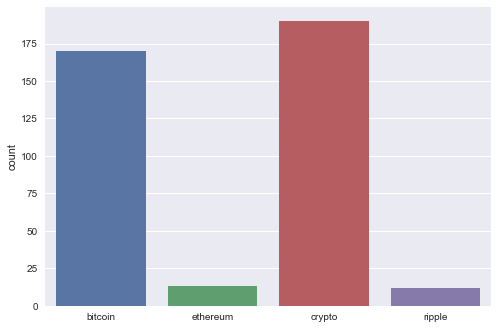

In [21]:
# Visualizing data

# Import packages
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set(color_codes=True)

# Create a list of labels:cd
cd = ['bitcoin', 'ethereum', 'crypto', 'ripple']

# Plot histogram
ax = sns.barplot(cd, [bitcoin, ethereum, crypto, ripple])
ax.set(ylabel="count")
plt.show()
